In [1]:
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
train = pd.read_csv("train.csv")
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


# Testua aztertzen

Testua aztertzeko listak sortuko ditugu esaldiak bilduko dituena

In [2]:
text = list(train.loc[:,"text"])
target = list(train.loc[:,"target"])
      
print(text[0:4],target[0:4])
print(len(text),len(target))
print(sum(target))

['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all', 'Forest fire near La Ronge Sask. Canada', "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected", '13,000 people receive #wildfires evacuation orders in California '] [1, 1, 1, 1]
7613 7613
3271


# Testua garbitzen

Hiztegiako puntuazio markak eta beste hainak karaktere kenduko dizkiogu textuari

In [3]:
def txtclean(txt):
    a=[]
    for x in text:
        p1=re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
        p1=p1.lower()
        a.append(p1)
    return a

text=txtclean(text)
text_test=text[:600]
target_test=target[:600]
text_train=text[600:]
target_train=target[600:]

# Bi testu bektore sortzen

0 eta 1koak desberdindu behar ditugu beraz horretan arituko gara. 

In [4]:
def texttrain(txt,tar):
    train1=[]
    train0=[]
    i=0
    for text in txt:
        if tar[i]==1:
            train1.append(text)
        else:
            train0.append(text)
        i=i+1
    return(train0,train1)

train0,train1=texttrain(text_train,target_train)
print(len(text_train))
print(len(train0))
print(len(train1))


7013
3985
3028


# Hiztegiak sortzen

Daukagun testuak hiztegi bihurtuko ditugu

In [5]:
# create the transform
vectorizer = CountVectorizer(ngram_range=(1,2),max_df=0.35)
# tokenize and build vocab
vectorizer.fit(text_train)
# summarize
# encode document
vtrain0 = vectorizer.transform(train0)
vtrain1 = vectorizer.transform(train1)
vtrain = vectorizer.transform(text_train)
vtest = vectorizer.transform(text_test)

In [6]:
# summarize encoded vector
for v in [vtrain0, vtrain1,vtrain, vtest] :    
    print(v.shape)
    print(type(v))
    print(v.toarray())
    print('-------------')

(3985, 84602)
<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
-------------
(3028, 84602)
<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
-------------
(7013, 84602)
<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
-------------
(600, 84602)
<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
-------------


# Bektoreak sortzen

Testuak bektoretan bihurtu ondoren, orain bektore guztiak batuko ditugu hitz bakoitzaren maiztasuna jakiteko.

In [7]:
vtrain1 = vtrain1.sum(axis=0)
vtrain0 = vtrain0.sum(axis=0)
vtrain = vtrain.sum(axis=0)

for v in [vtrain1,vtrain, vtrain0] :    
    print(v.shape)
    print(type(v))
    print(v)

(1, 84602)
<class 'numpy.matrix'>
[[25  3  0 ...  0  1  1]]
(1, 84602)
<class 'numpy.matrix'>
[[33  3  1 ...  1  1  1]]
(1, 84602)
<class 'numpy.matrix'>
[[8 0 1 ... 1 0 0]]


# Maiztasun erlatiboak

Maiztasun erlatiboak kalkulatuko ditugu.

In [8]:
ftrain1 = (vtrain1/vtrain1.sum())/np.sqrt(vtrain/vtrain.sum())
print(vtrain1.sum())
print(ftrain1,ftrain1.shape)
print(ftrain1.sum())
print('------------------------------')
ftrain0 = (vtrain0/vtrain0.sum())/np.sqrt(vtrain/vtrain.sum())
print(ftrain0,ftrain0.shape)
print(ftrain0.sum())
print('------------------------------')
ftest = (vtest.multiply(1/(1e-10+vtest.sum(axis=1))).toarray())/np.sqrt(vtrain/vtrain.sum())
print(ftest,ftest.shape)
print('------------------------------')
ftrain = vtrain/vtrain.sum()
print(ftrain)
print(ftrain.sum())
print('------------------------------')

88664
[[0.02188542 0.00871029 0.         ... 0.         0.00502889 0.00502889]] (1, 84602)
226.8869142268259
------------------------------
[[0.00563746 0.         0.00404809 ... 0.00404809 0.         0.        ]] (1, 84602)
241.4558362149922
------------------------------
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] (600, 84602)
------------------------------
[[1.65987626e-04 1.50897842e-05 5.02992807e-06 ... 5.02992807e-06
  5.02992807e-06 5.02992807e-06]]
1.0
------------------------------


In [9]:
for f in (ftrain1, ftrain0, ftrain, ftest):
    print(f.shape,f)
    print('--------------------')

(1, 84602) [[0.02188542 0.00871029 0.         ... 0.         0.00502889 0.00502889]]
--------------------
(1, 84602) [[0.00563746 0.         0.00404809 ... 0.00404809 0.         0.        ]]
--------------------
(1, 84602) [[1.65987626e-04 1.50897842e-05 5.02992807e-06 ... 5.02992807e-06
  5.02992807e-06 5.02992807e-06]]
--------------------
(600, 84602) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
--------------------


# Distantziak kalkulatuko ditugu


In [15]:
import numpy as np
#print(ftrain1.shape,ftrain1)
#print(ftrain0.shape,ftrain0)
#print(ftest.shape,ftest)

print('----')

atrain1 =np.dot(ftest,ftrain1.transpose())

print(atrain1.shape,max(atrain1))
print('----')
atrain0 = np.dot(ftest,ftrain0.transpose())
print(atrain0.shape,max(atrain0))

----
(600, 1) [[1.99493352]]
----
(600, 1) [[1.69822254]]


In [11]:
antz=np.log(np.divide((atrain0+1e-10),(atrain1+1e-10)))
antze=antz.transpose().tolist()[0]
print(min(antze))
print(max(antze))
print(antze,len(antze))

-2.304506563636429
2.549937886431415
[0.14090912623353535, -1.7226304624241913, -0.40657337643161295, -1.246468545883681, -0.32780182328885255, -1.5693573157949876, -1.436459728496035, -0.02415386457441304, -0.36445709786821834, -0.18532431583851738, -0.6975060367575253, 0.26963546383720693, 0.08491453761261432, -0.4404215755426392, -0.5043358212859548, 0.7351250187116786, 2.549937886431415, 0.615970807155694, 0.3627699104758454, 0.506047329656907, 0.19254533464195664, 0.04789940564164664, 1.7918711601531536, 1.1568633696969948, 0.0, 0.7148711793958217, -0.23337450125317097, 2.468356801588816, 0.0, 1.6410154162188137, 0.2845341717397312, 0.40208639436552357, 0.45053898863991815, -0.23854680148904003, 0.17394260680547308, 0.1717796311264676, 0.8557112919832609, -1.7254813808706806, -0.7370885573986643, 1.065058778584444, 0.9599074502457017, 0.25404111477780483, 0.7564546005077386, 0.9714742469582474, 0.783227814981395, 0.7135231969496322, -0.5148796630149475, -0.19094463908479944, 0.959

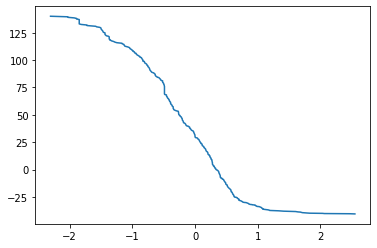

-40.5
2.549937886431415


In [12]:
def errorea(score,target):
    z = sorted(zip(score,target))
    g2 = [ y for x,y in z ]
    s2 = [ x for x,y in z ]
    erro=[]
    eps=[]
    n = len(s2)
    for i,x in enumerate(s2):
        e1 = sum(g2[:i+1])
        e2 = n-i-1-sum(g2[i+1:])
        e = (e1+e2)/n * 100
        erro.append(e)
        eps.append(x)
    return(eps,erro)

eps,erro=errorea(antze,target_test)        
plt.plot(eps,erro)
plt.show()
epsilon=eps[erro.index(min(erro))]

print(min(erro))
print(epsilon)

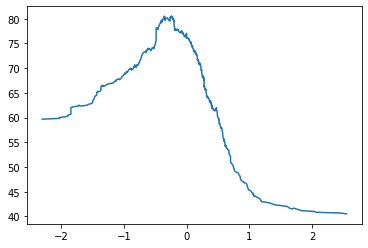

80.5
-0.3521871709758365


In [13]:
def antzeko(score,target):
    z = sorted(zip(score,target))
    g2 = [ y for x,y in z ]
    s2 = [ x for x,y in z ]
    zeh=[]
    eps=[]
    n = len(s2)
    for i,x in enumerate(s2):
        e1 = sum(g2[:i+1])
        e2 = n-i-1-sum(g2[i+1:])
        e = (e1+e2)/n * 100
        zeh.append(e)
        eps.append(x)
    return(eps,zeh)

eps,zeh=antzeko(antze,target_test)        
plt.plot(eps,zeh)
plt.show()
epsilon=eps[zeh.index(max(zeh))]

print(max(zeh))
print(epsilon)